In [1]:
%cd ..

/home/eli/AnacondaProjects/categorical_bpl


In [2]:
import argparse
import collections
import pyro
import torch
import numpy as np
import data_loader.data_loaders as module_data
import model.model as module_arch
from parse_config import ConfigParser
from trainer import Trainer

RDKit WARNING: [11:17:37] Enabling RDKit 2019.09.3 jupyter extensions


In [3]:
%matplotlib inline

In [4]:
# pyro.enable_validation(True)
# torch.autograd.set_detect_anomaly(True)

In [5]:
# fix random seeds for reproducibility
SEED = 123
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(SEED)

In [6]:
Args = collections.namedtuple('Args', 'config resume device')
config = ConfigParser.from_args(Args(config='mnist_config.json', resume=None, device=None))

In [7]:
logger = config.get_logger('train')

In [8]:
# setup data_loader instances
data_loader = config.init_obj('data_loader', module_data)
valid_data_loader = data_loader.split_validation()

In [9]:
# build model architecture, then print to console
model = config.init_obj('arch', module_arch)

In [10]:
optimizer = pyro.optim.ReduceLROnPlateau({
    'optimizer': torch.optim.Adam,
    'optim_args': {
        "lr": 1e-3,
        "weight_decay": 0,
        "amsgrad": True
    },
    "patience": 50,
    "factor": 0.1,
    "verbose": True,
})

In [11]:
# optimizer = config.init_obj('optimizer', pyro.optim)

In [12]:
trainer = Trainer(model, [], optimizer, config=config,
                  data_loader=data_loader,
                  valid_data_loader=valid_data_loader,
                  lr_scheduler=optimizer)

In [13]:
trainer.train()

Train Epoch: 1 [512/54000 (1%)] Loss: 521251.875000
Train Epoch: 1 [11776/54000 (22%)] Loss: 165962.812500
Train Epoch: 1 [23040/54000 (43%)] Loss: -342528.250000
Train Epoch: 1 [34304/54000 (64%)] Loss: -432152.625000
Train Epoch: 1 [45568/54000 (84%)] Loss: -285557.937500
    epoch          : 1
    loss           : -116066.02691831683
    val_loss       : -247751.18281539678
Train Epoch: 2 [512/54000 (1%)] Loss: -341665.375000
Train Epoch: 2 [11776/54000 (22%)] Loss: -338387.062500
Train Epoch: 2 [23040/54000 (43%)] Loss: -214675.781250
Train Epoch: 2 [34304/54000 (64%)] Loss: -281941.750000
Train Epoch: 2 [45568/54000 (84%)] Loss: -95408.820312
    epoch          : 2
    loss           : -272623.3972772277
    val_loss       : -284026.973649174
Train Epoch: 3 [512/54000 (1%)] Loss: -542623.250000
Train Epoch: 3 [11776/54000 (22%)] Loss: -215582.296875
Train Epoch: 3 [23040/54000 (43%)] Loss: -365133.687500
Train Epoch: 3 [34304/54000 (64%)] Loss: -115200.710938
Train Epoch: 3 [45568

In [14]:
model.cpu()

VaeCategoryModel(
  (_category): FreeCategory(
    (generator_0): DensityDecoder(
      (distribution): DiagonalGaussian()
      (neural_layers): Sequential(
        (0): Linear(in_features=8, out_features=12, bias=True)
        (1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
        (2): PReLU(num_parameters=1)
        (3): Linear(in_features=12, out_features=12, bias=True)
        (4): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
        (5): PReLU(num_parameters=1)
        (6): Linear(in_features=12, out_features=32, bias=True)
      )
    )
    (generator_1): DensityEncoder(
      (distribution): DiagonalGaussian()
      (neural_layers): Sequential(
        (0): Linear(in_features=16, out_features=12, bias=True)
        (1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
        (2): PReLU(num_parameters=1)
        (3): Linear(in_features=12, out_features=12, bias=True)
        (4): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
        (5): PReLU(num_

In [15]:
import matplotlib.pyplot as plt

Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral


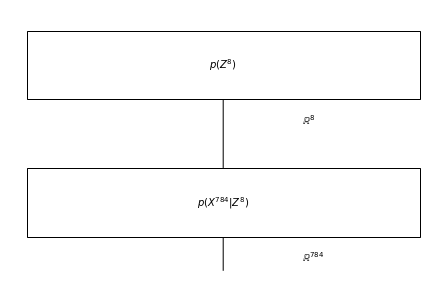

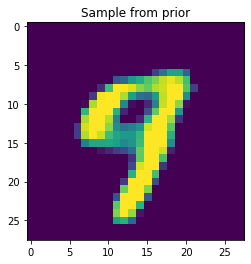

Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral


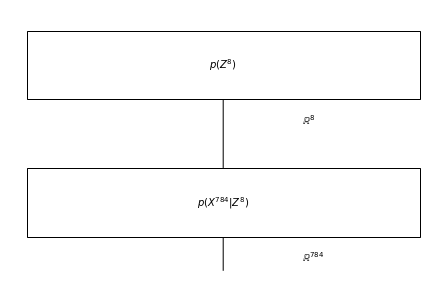

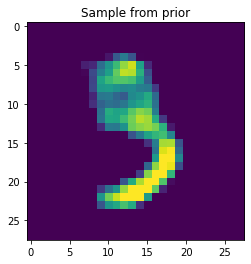

Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral


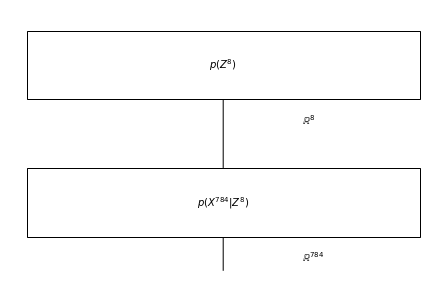

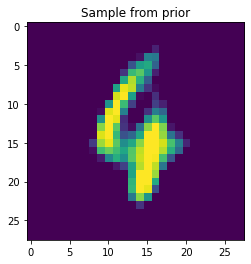

Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral


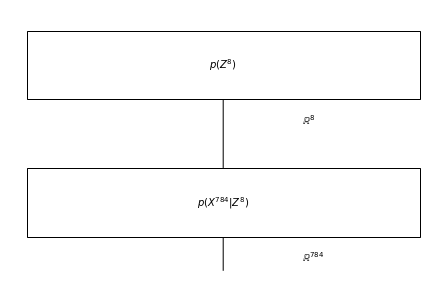

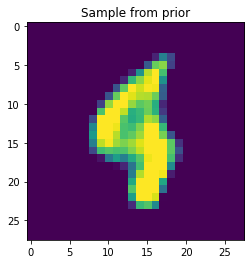

Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral


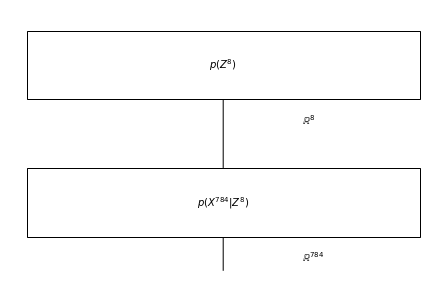

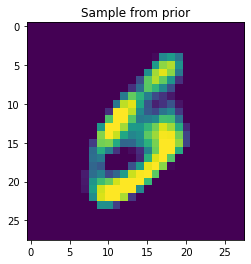

Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral


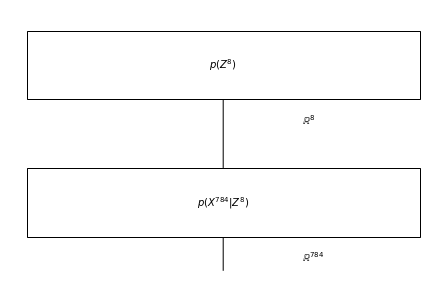

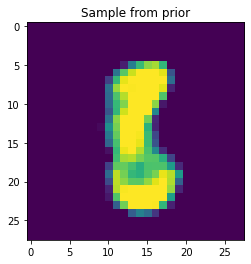

Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral


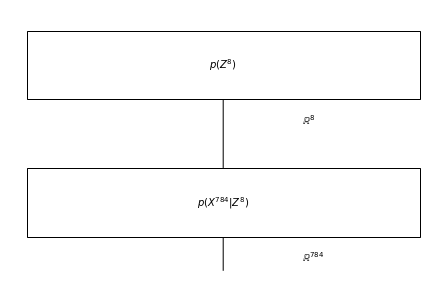

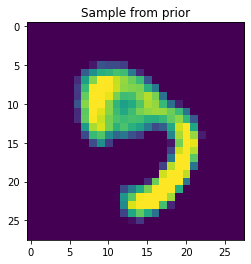

Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral


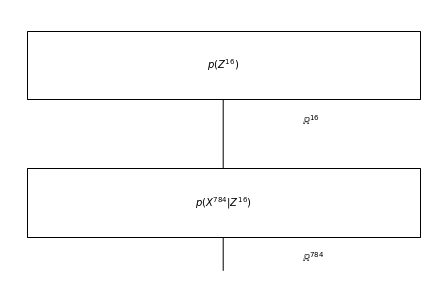

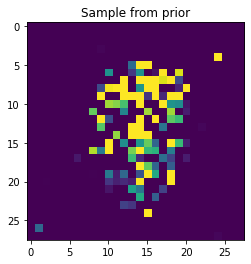

Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral


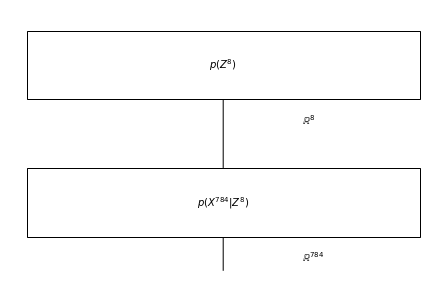

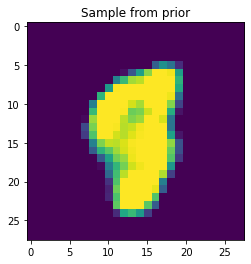

Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral


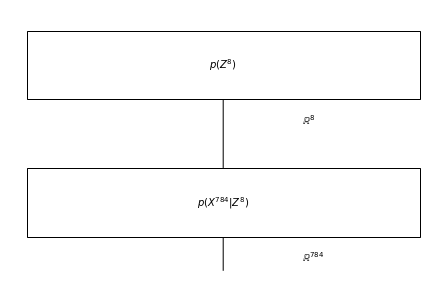

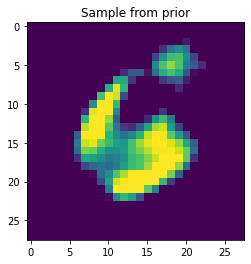

In [16]:
for k in range(10):
    path, sample = model(None)
    sample = sample.view(28, 28).detach().cpu().numpy()
    path.draw()

    plt.title('Sample from prior')
    plt.imshow(sample)
    plt.show()